**Yoga Pose detection using Deep learning**

Computer vision is a field of Artificial Intelligence that focuses on interpreting the world around us from images and videos. Computer vision finds a lot of use in various fields like retail, healthcare, agriculture, security applications, and so on.


This current work focuses on using Computer Vision to analyze a person doing Suryanamaskara by detecting their pose. The user experience (UX) and learning can be improved immensely by capturing the user’s actual performance through video and applying computer vision techniques to retrieve the various poses for further analysis. Similar applications can be made with respect to dance steps which will help in better practice.

There are 12 poses associated with Suryanamaskar.  Among these 12 poses, 5 pairs are identical.  These pairs are [1 and 12], [2 and 11], [3 and 10], [4 and 9] and [5,8]. We are building a system that can detect each pose.

![surya](https://1.bp.blogspot.com/-eFtgtu7V_SI/WQWupDLxPiI/AAAAAAAAAQA/kh4LjXAJHQAcIV7hfQvPZSgFZCNwiqIZgCLcB/s320/Surya-Namaskara.jpg)

The problem can be broken down into parts:

Step 1: Data collection and pre-processing

Step 2: Extract key frames from videos

Step 3: Pose detection using deep learning


The work flow of pose detection and comparison is summarized here.

•	The first step is to identify relevant images and extract important frames in case of videos.    The key frames from a video are identified where the performer remains still for some time (like 10 second). 

•	Once the key frames and images are identified, the human in an image is detected. The image is used for pose detection and keypoint estimation.  

•	Pose detection is done using deep learning

**Step 1: Data Collection and Preprocessing** 

Yoga Data is collected from various public sources like google images and youtube videos. The first step followed by data collection is preprocessing. Preprocessing is required because often the raw data is not good enough to pass as an input to a system. So, we have to process the data to make it useful. Preprocessing examples might include making all the images of the same size, or pruning out incorrect data.

Data Cleaning:

The database that was developed was first manually searched to remove incomplete poses, incorrect poses and images having multiple objects. 

Pose and keypoint detection:

Once the cleaning-up of the images and frames is achieved, identification of human poses needs to be carried out.  This step involves estimating where different body joints are located.  Posenet is a computer vision model where human pose estimation can be done in real time, for example, where someone’s elbow shows up in an image.

Typical output one can expect from videos and images would be along the following lines:

![dancegif](https://www.learnopencv.com/wp-content/uploads/2018/05/openpose-dance.gif)

![tennis](https://www.learnopencv.com/wp-content/uploads/2018/05/OpenPose-683x1024.jpg)
*Figure 1 : Sample Skeleton output of pose estimation. Image Credit: Oliver Sjöström, Instagram: @ollivves, Website: https://ollivves.com/*




**Image Analytics using OpenCV**

OpenCV is an incredibly useful open source Computer Vision library and is widely used for performing Computer Vision tasks. 

For the training purpose, the COCO keypoints dataset is chosen because it is a multi-person 2D Pose Estimation dataset. So, it is robust as compared to other models as it can handle the case when there are more than one persons in an image. COCO is also the largest 2D Pose Estimation dataset, to date, and is considering a benchmark for Pose Estimation algorithms.

The COCO Computer vision dataset defines the body points as follows:

**COCO Output** Format Nose – 0, Neck – 1, Right Shoulder – 2, Right Elbow – 3, Right Wrist – 4, Left Shoulder – 5, Left Elbow – 6, Left Wrist – 7, Right Hip – 8, Right Knee – 9, Right Ankle – 10, Left Hip – 11, Left Knee – 12, LAnkle – 13, Right Eye – 14, Left Eye – 15, Right Ear – 16, Left Ear – 17, Background – 18 

![keypoints](https://miro.medium.com/max/774/1*bw8pR21l9i9otJoU5FlGiA.png)
*Fig 3: Keypoints of COCO model.

You can download the pre-trained model [here](https://bigvisionllc.lpages.co/leadbox/143948b73f72a2:173c9390c346dc/5649050225344512/).



Pose Estimation steps:
    
1. Removing the background from the image and focusing on the human figure present
2. Locating the human figure in the image
3. Feature extraction from the image, for instance, the histogram of the pixels of the image, so that, the machine learning algorithm can exploit the features
4. Using the features to build a confidence map, like providing a likely indication of body joints in the image

![condifence map](https://miro.medium.com/max/443/1*z9ur3lTUbfrIPRqjAGthmQ.jpeg)
5. Inferencing where the joints are present based on the confidence map

I am using a prebuilt model that follows the steps and gives a detailed output showing the estimated poses

In [1]:
#Libraries
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the prebuilt model. The prebuilt model for pose recognition
protoFile = r"C:\Users\admin\Desktop\ISB\Human_Pose_Detection\pose\coco/pose_deploy_linevec.prototxt"
weightsFile = r"C:\Users\admin\Desktop\ISB\Human_Pose_Detection\pose\coco/pose_iter_440000.caffemodel"
nPoints = 18
POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]


In [3]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

### Applying Our Key Point Estimation Model to Suryanamaskar Data

In [4]:
frame = cv2.imread(r"C:\Users\admin\Desktop\ISB\Human_Pose_Detection\1Pranamasana.jpg")

frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [5]:
# Pass it through the network
inHeight = 368
inWidth = 368

inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)


net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

[(436, 46), (411, 92), (411, 92), (436, 162), (461, 139), (399, 92), (424, 139), (449, 139), (424, 220), (411, 325), (411, 429), (424, 208), (411, 325), (411, 429), (424, 46), None, (411, 58), None]


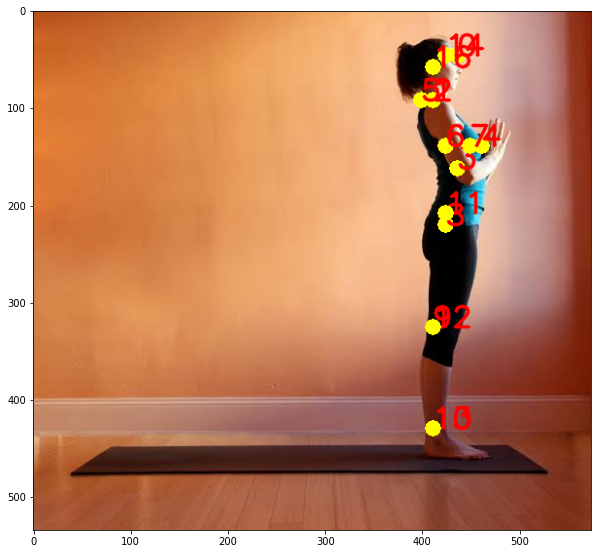

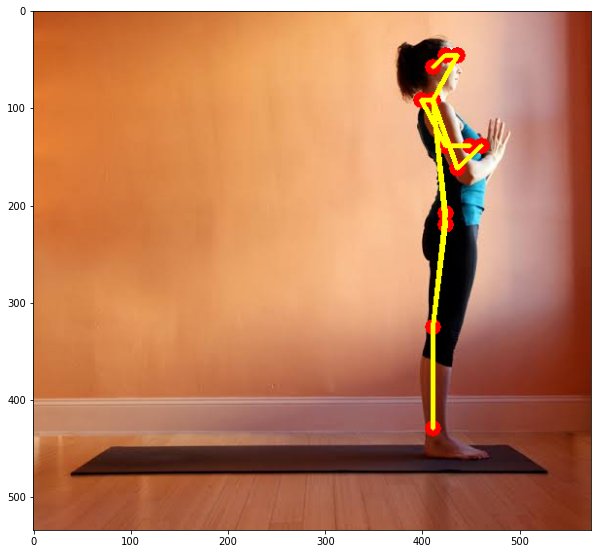

In [6]:
# Generate Key Points

# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    #print location of 15 joints (only need the last value).... need to know which joint each point represents.
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)
        
# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

print(points)